# Exploratory Data Analysis (EDA)
This notebook performs EDA on the Chest X-Ray Images (Pneumonia) dataset.

In [3]:
# Enable autoreload for imports
%load_ext autoreload
%autoreload 2

# Import required libraries
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from config import config

from dataloaders import train_dataset

c:\Users\paesc\anaconda3\envs\py311\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Q1.1 Explore the label dist and the data distribution of the dataset

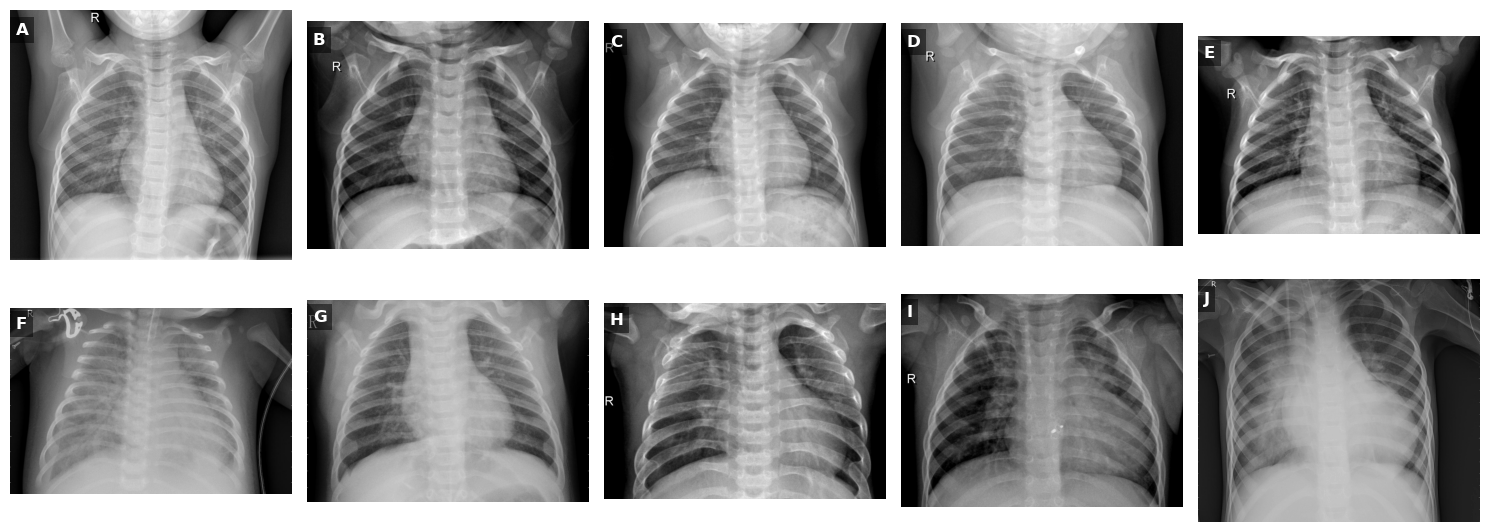

c:\Users\paesc\anaconda3\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\paesc\anaconda3\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\paesc\anaconda3\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


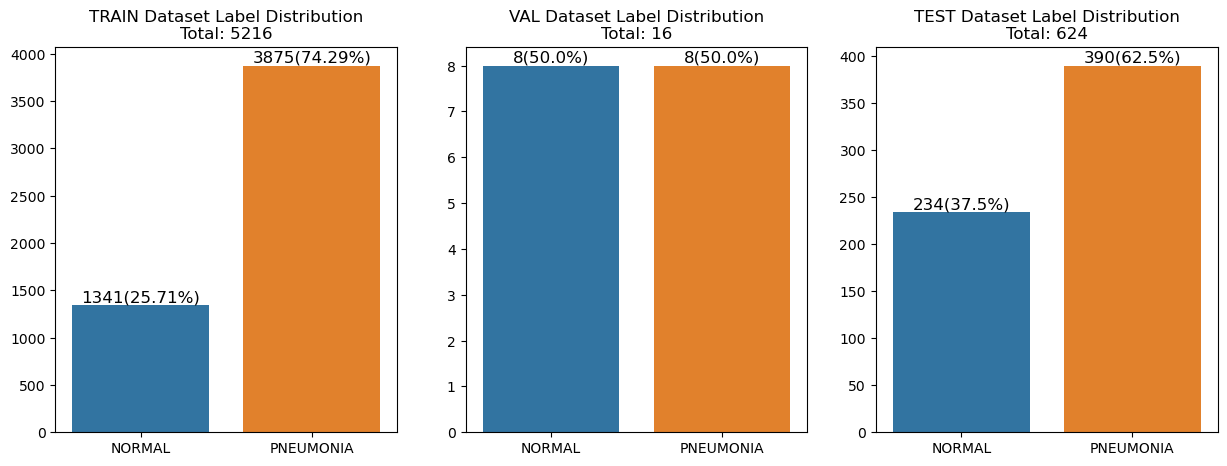

In [14]:
# Q1.1: Explore the label distribution and plot examples
from collections import Counter
import numpy as np

def visualize_image_rows(set_type, starting_index=0):
    """
    Visualize one row of NORMAL images and one row of PNEUMONIA images.

    Parameters:
    - set_type (str): Dataset type ('train', 'test', or 'val').
    - starting_index (int): Starting index for selecting images to display.
    """
    # Load the images of NORMAL and PNEUMONIA classes
    normal_path = config.datapath / set_type / "NORMAL"
    pneumonia_path = config.datapath / set_type / "PNEUMONIA"
    normal_images = list(normal_path.glob("*.jpeg"))
    pneumonia_images = list(pneumonia_path.glob("*.jpeg"))

    # Prepare the figure
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))

    # Plot NORMAL images
    for i, ax in enumerate(axes[0]):
        if starting_index + i < len(normal_images):
            img = plt.imread(normal_images[starting_index + i])
            ax.imshow(img, cmap='gray')
            ax.axis('off')
            ax.text(0.02, 0.95, f"{chr(65 + i)}", transform=ax.transAxes, fontsize=12, color='white', 
                    fontweight='bold', va='top', ha='left', bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))
        else:
            ax.axis('off')
    axes[0, 0].set_ylabel("NORMAL", fontsize=14, labelpad=10)

    # Plot PNEUMONIA images
    for i, ax in enumerate(axes[1]):
        if starting_index + i < len(pneumonia_images):
            img = plt.imread(pneumonia_images[starting_index + i])
            ax.imshow(img, cmap='gray')
            ax.axis('off')
            ax.text(0.02, 0.95, f"{chr(65 + i + 5)}", transform=ax.transAxes, fontsize=12, color='white', 
                    fontweight='bold', va='top', ha='left', bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))
        else:
            ax.axis('off')
    axes[1, 0].set_ylabel("PNEUMONIA", fontsize=14, labelpad=10)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# Example usage
visualize_image_rows(set_type="train", starting_index=0)
# visualize_image_rows(set_type="val", starting_index=0)
# visualize_image_rows(set_type="test", starting_index=0)

# plot the label distribution of the three datasets
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, set_type in enumerate(["train", "val", "test"]):



    normal_path = config.datapath / set_type / "NORMAL"
    pneumonia_path = config.datapath / set_type / "PNEUMONIA"
    normal_images = list(normal_path.glob("*.jpeg"))
    pneumonia_images = list(pneumonia_path.glob("*.jpeg"))

    tot_len = len(normal_images) + len(pneumonia_images)
    # barplot
    sns.barplot(x=["NORMAL", "PNEUMONIA"], y=[len(normal_images), len(pneumonia_images)], ax=axes[i])
    # add numbers on top of the bars
    for j, count in enumerate([len(normal_images), len(pneumonia_images)]):
        axes[i].text(j, count + (count/1000), str(count) + f"({round(count/tot_len*100, 2)}%)", ha='center', va='bottom', fontsize=12)
    # add total count in title of set and fraction of each class
    axes[i].set_title(f"{set_type.upper()} Dataset Label Distribution\nTotal: {len(normal_images) + len(pneumonia_images)}")
    
    # axes[i].set_title(f"{set_type.upper()} Dataset Label Distribution")
plt.show()
    


# Q1.2: Visual Differences
Yes, there are visual differences between healthy (NORMAL) and disease (PNEUMONIA) samples. Pneumonia images often show opacities or abnormalities in the lung regions, while normal images have clear lung structures.

# Q1.3: Potential Source of Bias
One potential source of bias could be the quality and resolution of the X-ray images. If the images for one class (e.g., PNEUMONIA) are taken with different equipment or under different conditions compared to the other class (e.g., NORMAL), the model might learn to differentiate based on these artifacts rather than the actual medical condition.
A second source of bias could be the origin of pneumonia patients being different than healthy, maybe all from a SMOG region or similar. 
In addition, maybe all pneumonia patients are smokers maybe. 

# Q1.4: Data Preprocessing
To preprocess the data for further analysis, the following steps are applied:
1. Resize all images to a uniform size (224x224) to ensure consistency.
2. Normalize the pixel values to have a mean of 0.5 and a standard deviation of 0.5 to standardize the input.
3. Convert images to tensors for compatibility with PyTorch models.

Additional things we could try: augmentation, class balancing and noise reduction